<a href="https://colab.research.google.com/github/kul-pat/Public-Machine-learning/blob/main/Talos_for_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install talos

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam,Nadam,RMSprop
from tensorflow.keras.metrics import binary_crossentropy,logcosh
from tensorflow.keras.activations import relu,elu,sigmoid
from talos.model.normalizers import lr_normalizer
import sys
import talos as ta
import numpy as np
import pandas as pd
import tensorflow
from talos.utils import hidden_layers 

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x= np.array(df.drop('Outcome',axis=1))
y= np.array(df['Outcome'])
x = ta.utils.rescale_meanzero(x)
x.shape

(768, 8)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,y_tarin,x_test,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
 def diabetes_model(x_train,y_train,x_test,y_test,params):
   model = Sequential()
   model.add(Dense(params['first_neuron'],input_dim=x_train.shape[1], 
                   activation=params['activation'],kernel_initializer=params['kernel_initializer']))
   
   model.add(Dropout(params['dropout']))
   hidden_layers( model, params, 1)

   model.add(Dense(1,activation=sigmoid,kernel_initializer=params['kernel_initializer']))

   model.compile(loss=params['losses'],
                optimizer=params['optimizer'](lr_normalizer(params['lr'], params['optimizer'])),
                metrics=['acc',ta.utils.metrics.f1score]) 
   history = model.fit(x_train,y_train, 
                       validation_data=[x_test,y_test],
                       batch_size=params['batch_size'],
                       epochs=params['epochs'],verbose=0)  
   return history,model  

In [ ]:
p = {'lr': (0.0001, 0.01, 1),
    'first_neuron':(2,200,5),
    'hidden_layers':[3,5,7,9],
    'batch_size': [100,500,1000],
    'epochs': [500],
    'dropout': (0,0.5,5),
    'shapes':['brick','funnel'],
    'kernel_initializer': ['uniform','normal'],
    'optimizer': [Adam, Nadam, RMSprop],
    'losses': ['binary_crossentropy','logcosh'],
    'activation':['relu', 'elu'],
    'last_activation': ['sigmoid']}

In [ ]:
t = ta.Scan(x=x,
               y=y,
               model=diabetes_model,
               params=p,
               experiment_name='DB',
               round_limit=10)

100%|██████████| 10/10 [04:05<00:00, 24.57s/it]


In [ ]:
ta.Analyze(t)

In [ ]:
ta.Evaluate(t)

In [ ]:
# accessing the results data frame
t.data.head()

# accessing epoch entropy values for each round
t.learning_entropy

# access the summary details
t.details

experiment_name                      db
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            11/10/21/07:06
x_shape                        (768, 8)
y_shape                          (768,)
dtype: object

In [ ]:
# accessing the saved models
t.saved_models

# accessing the saved weights for models
t.saved_weights

[[array([[-8.07493739e-03,  3.41172367e-02,  7.48004541e-02,
           4.88037355e-02, -1.22782238e-01, -1.90473441e-03,
          -6.03985637e-02, -5.08674420e-02,  5.61924651e-03,
          -5.48411943e-02, -8.52140482e-04, -1.51502732e-02,
          -3.18435207e-02, -8.89304094e-03, -4.02977765e-02,
          -5.44894412e-02,  5.16535677e-02,  2.99428888e-02,
          -8.89120847e-02,  2.29141745e-03,  3.49220820e-03,
          -8.12443811e-03, -7.17937853e-03, -2.69908700e-02,
           3.61291803e-02, -1.17713712e-01, -7.36274794e-02,
          -8.19619298e-02, -2.12653913e-03, -3.47150005e-02,
          -2.68015880e-02, -1.09260939e-01, -1.08850133e-02,
           1.54291429e-02,  4.60215919e-02, -1.17736466e-01,
           9.35119484e-03, -2.66357930e-03,  2.17272416e-02,
          -1.24650538e-01, -7.88563192e-02, -3.11153047e-02,
           1.11205811e-02, -1.53434533e-03,  5.15275151e-02,
          -4.88563515e-02, -1.44710653e-02,  7.46761709e-02,
          -7.12955743e-0

In [ ]:
# use Scan object as input
analyze_object = ta.Analyze(t)

In [ ]:
# access the dataframe with the results
analyze_object.data

,start,end,duration,round_epochs,loss,acc,f1score,val_loss,val_acc,val_f1score,activation,batch_size,dropout,epochs,first_neuron,hidden_layers,kernel_initializer,last_activation,losses,lr,optimizer,shapes
0,11/10/21-065926,11/10/21-065929,3.257218,100,0.464481,0.785847,0.660767,0.478039,0.761905,0.630872,elu,703,0.0,100,81,0,uniform,sigmoid,binary_crossentropy,2.30,<class 'keras.optimizer_v2.adam.Adam'>,funnel
1,11/10/21-065929,11/10/21-065945,15.545002,100,0.042488,0.886406,0.788580,0.103234,0.709957,0.578220,relu,10,0.4,100,160,0,uniform,sigmoid,logcosh,3.65,<class 'keras.optimizer_v2.nadam.Nadam'>,funnel
2,11/10/21-065945,11/10/21-065951,5.838048,100,0.069582,0.791434,0.680000,0.075392,0.761905,0.640523,elu,703,0.3,100,160,0,normal,sigmoid,logcosh,1.40,<class 'keras.optimizer_v2.rmsprop.RMSprop'>,funnel
3,11/10/21-065951,11/10/21-065955,3.385191,100,0.455456,0.785847,0.666667,0.475671,0.757576,0.626667,elu,901,0.1,100,61,0,normal,sigmoid,binary_crossentropy,1.85,<class 'keras.optimizer_v2.nadam.Nadam'>,brick
4,11/10/21-065955,11/10/21-065958,3.207682,100,0.063367,0.808194,0.724848,0.077589,0.757576,0.641026,relu,406,0.0,100,41,0,normal,sigmoid,logcosh,2.75,<class 'keras.optimizer_v2.adam.Adam'>,brick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11/10/21-070614,11/10/21-070617,3.216772,100,0.464173,0.782123,0.652819,0.479164,0.761905,0.635761,elu,604,0.3,100,41,0,uniform,sigmoid,binary_crossentropy,1.85,<class 'keras.optimizer_v2.adam.Adam'>,funnel
96,11/10/21-070617,11/10/21-070621,3.609143,100,0.070061,0.789572,0.666235,0.074879,0.770563,0.653595,elu,406,0.1,100,180,0,normal,sigmoid,logcosh,0.95,<class 'keras.optimizer_v2.rmsprop.RMSprop'>,funnel
97,11/10/21-070621,11/10/21-070624,3.391571,100,0.068705,0.785847,0.673671,0.075526,0.753247,0.627451,elu,307,0.1,100,81,0,normal,sigmoid,logcosh,3.20,<class 'keras.optimizer_v2.adam.Adam'>,brick
98,11/10/21-070625,11/10/21-070628,3.241688,100,0.061355,0.817505,0.718391,0.078751,0.748918,0.623377,relu,604,0.3,100,61,0,normal,sigmoid,logcosh,4.10,<class 'keras.optimizer_v2.rmsprop.RMSprop'>,brick


In [ ]:
# get the number of rounds in the Scan
analyze_object.rounds()

100

In [ ]:
# get the highest result for any metric
analyze_object.high('val_acc')

# get the round with the best result
analyze_object.rounds2high('val_acc')

# get the best paramaters
analyze_object.best_params('val_acc', ['acc', 'loss', 'val_loss'])

# get correlation for hyperparameters against a metric
analyze_object.correlate('val_loss', ['acc', 'loss', 'val_loss'])

duration         0.048689
round_epochs          NaN
f1score          0.069573
val_acc          0.011954
val_f1score      0.045808
batch_size       0.126507
dropout         -0.189981
epochs                NaN
first_neuron     0.095594
hidden_layers         NaN
lr               0.101661
Name: val_loss, dtype: float64

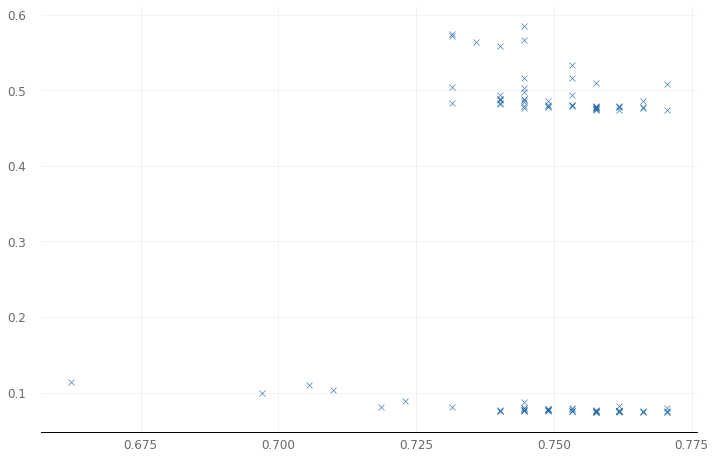

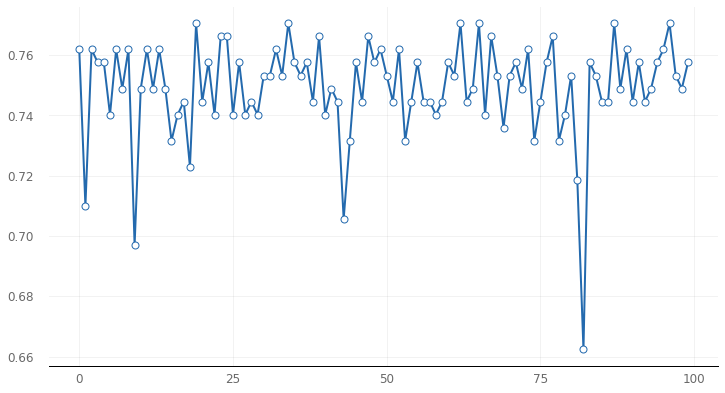

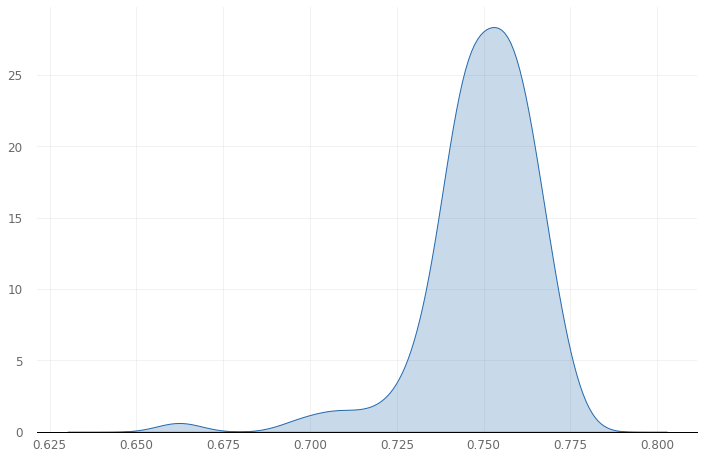

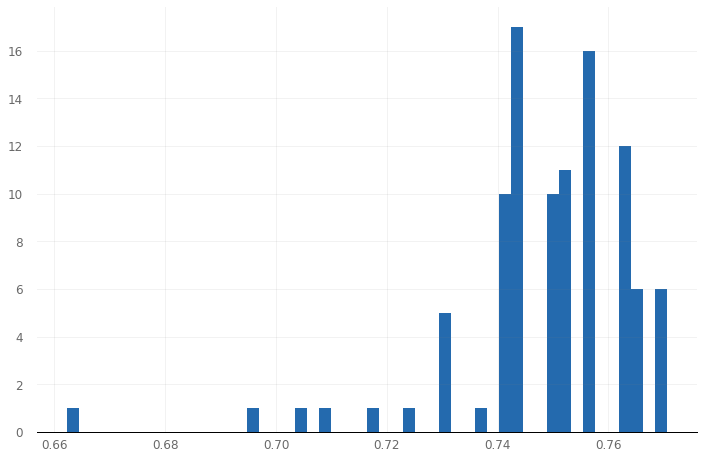

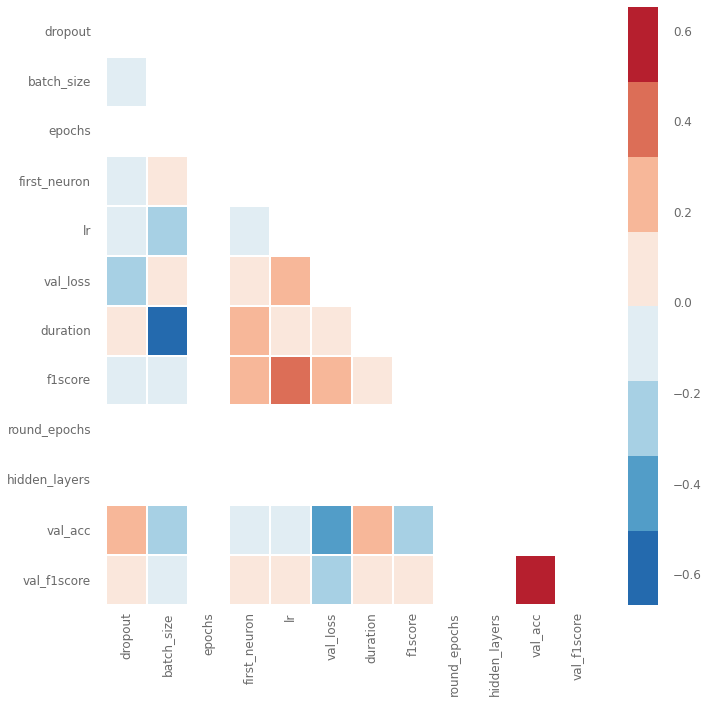

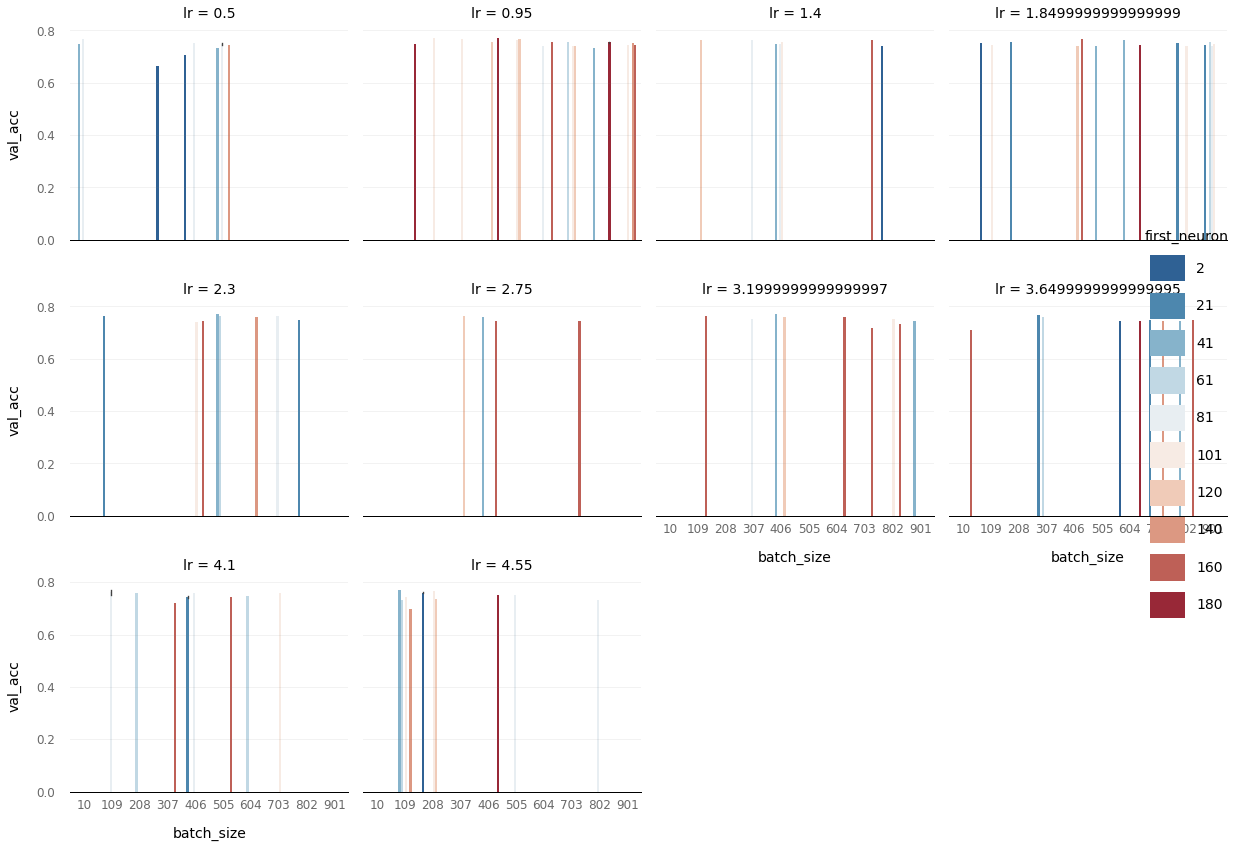

In [ ]:
# a regression plot for two dimensions 
analyze_object.plot_regs('val_acc', 'val_loss')

# line plot
analyze_object.plot_line('val_acc')

# up to two dimensional kernel density estimator
analyze_object.plot_kde('val_acc')

# a simple histogram
analyze_object.plot_hist('val_acc', bins=50)

# heatmap correlation
analyze_object.plot_corr('val_loss', ['acc', 'loss', 'val_loss'])

# a four dimensional bar grid
analyze_object.plot_bars('batch_size', 'val_acc', 'first_neuron', 'lr')

In [ ]:
evaluate_object = ta.Evaluate(t)
evaluate_object.evaluate(x, y, folds=10, metric='val_acc', task='multi_label')

AxisError: ignored

In [ ]:
ta.Deploy(scan_object=t, model_name='Diabetes_deploy', metric='val_acc');

Deploy package Diabetes_deploy have been saved.


In [ ]:
Diabetes = ta.Restore('Diabetes_deploy.zip')

NameError: ignored

In [ ]:
# make predictions with the model
Diabetes.model.predict(x)

In [ ]:
# get the meta-data for the experiment
Diabetes.details

In [ ]:
# get the hyperparameter space boundary
Diabetes.params

In [ ]:
# sample of x and y data
Diabetes.x
Diabetes.y

In [ ]:
# the results dataframe
Diabetes.results